# QSAR Model Building of COVID19 Inhibitors

## 1. Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('4_COVID19_bioactivity_data_3class_pIC50_pubchem_fp_Descriptor_Calculation_Part.cvs')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.060481
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.698970
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.522879
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.823909
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.366532
210,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.259637
211,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.387216
212,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.494850


In [4]:
X = df.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
210,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
211,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
212,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y = df.iloc[:,-1]
Y

0      3.060481
1      3.698970
2      3.522879
3      4.823909
4      5.000000
         ...   
209    5.366532
210    5.259637
211    5.387216
212    5.494850
213    5.055517
Name: pIC50, Length: 214, dtype: float64

## 2. Remove low variance features

In [8]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP21,PubchemFP33,PubchemFP37,...,PubchemFP780,PubchemFP788,PubchemFP797,PubchemFP798,PubchemFP799,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
210,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
212,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X.to_csv('descriptor_list.csv', index = False)

## 3. Random Forest Regression Model

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.7560510254122788

## 4. Model Prediction

In [12]:
Y_pred = model.predict(X)
Y_pred

array([3.49525007, 3.71997276, 3.76384961, 4.96336337, 4.96070311,
       4.16336706, 3.74454659, 5.16034993, 4.37513114, 4.67795316,
       4.4818168 , 4.46061157, 4.4818168 , 4.46061157, 5.13803278,
       4.34272179, 4.34051155, 4.67795316, 3.74454659, 4.34272179,
       4.34791992, 4.16336706, 4.34051155, 5.13803278, 5.39389767,
       5.28520866, 5.02555545, 5.31173088, 5.09680048, 4.87449951,
       4.71516268, 4.78755717, 4.63461506, 4.71516268, 4.34906917,
       4.34906917, 4.32245222, 4.65152356, 4.32245222, 4.65152356,
       4.32963293, 4.32963293, 4.96351044, 4.86687865, 4.86687865,
       4.96351044, 4.80760708, 4.93204269, 4.93204269, 4.80760708,
       4.58075929, 4.58075929, 4.44299161, 4.76068897, 4.44299161,
       4.99391854, 5.23516801, 4.91741614, 5.38698785, 4.5002922 ,
       4.74723539, 4.78516919, 4.88858173, 5.01072383, 5.02232958,
       4.41479889, 4.78516919, 4.78516919, 5.01072383, 5.04225608,
       3.69309119, 3.69309119, 4.14863347, 3.96163196, 3.96348

## 5. Model Performance

In [13]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.09
Coefficient of determination (R^2): 0.76


## 6. Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

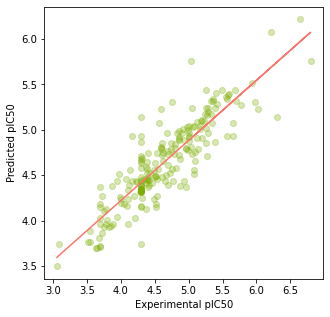

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

## 7. Save Model as Pickle Object

In [16]:
import pickle

In [17]:
pickle.dump(model, open('COVID19_model.pkl', 'wb'))